<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/EDA_Kaggle_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import os

# Upload the API token.
def get_kaggle_credentials():
  token_dir = os.path.join(os.path.expanduser("~"),".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file,'r') as f:
      pass
  except IOError as no_file:
    try:
      from google.colab import files
    except ImportError:
      raise no_file
    
    uploaded = files.upload()
    
    if "kaggle.json" not in uploaded:
      raise ValueError("You need an API key! see: "
                       "https://github.com/Kaggle/kaggle-api#api-credentials")
    with open(token_file, "wb") as f:
      f.write(uploaded["kaggle.json"])
    os.chmod(token_file, 600)

get_kaggle_credentials()


Saving kaggle.json to kaggle.json


In [0]:
import kaggle

In [0]:
competition_name = "house-prices-advanced-regression-techniques"

In [0]:
kaggle.api.competition_download_files(competition_name, competition_name)

## EDA

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [0]:
df = pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
[(column, df[column].count() / len(df)) for column in df  ]

[('Id', 1.0),
 ('MSSubClass', 1.0),
 ('MSZoning', 1.0),
 ('LotFrontage', 0.8226027397260274),
 ('LotArea', 1.0),
 ('Street', 1.0),
 ('Alley', 0.06232876712328767),
 ('LotShape', 1.0),
 ('LandContour', 1.0),
 ('Utilities', 1.0),
 ('LotConfig', 1.0),
 ('LandSlope', 1.0),
 ('Neighborhood', 1.0),
 ('Condition1', 1.0),
 ('Condition2', 1.0),
 ('BldgType', 1.0),
 ('HouseStyle', 1.0),
 ('OverallQual', 1.0),
 ('OverallCond', 1.0),
 ('YearBuilt', 1.0),
 ('YearRemodAdd', 1.0),
 ('RoofStyle', 1.0),
 ('RoofMatl', 1.0),
 ('Exterior1st', 1.0),
 ('Exterior2nd', 1.0),
 ('MasVnrType', 0.9945205479452055),
 ('MasVnrArea', 0.9945205479452055),
 ('ExterQual', 1.0),
 ('ExterCond', 1.0),
 ('Foundation', 1.0),
 ('BsmtQual', 0.9746575342465753),
 ('BsmtCond', 0.9746575342465753),
 ('BsmtExposure', 0.9739726027397261),
 ('BsmtFinType1', 0.9746575342465753),
 ('BsmtFinSF1', 1.0),
 ('BsmtFinType2', 0.9739726027397261),
 ('BsmtFinSF2', 1.0),
 ('BsmtUnfSF', 1.0),
 ('TotalBsmtSF', 1.0),
 ('Heating', 1.0),
 ('Heating

In [14]:
[(column, df[column].count() / len(df)) for column in df if df[column].count() / len(df) < 0.3 ]

[('Alley', 0.06232876712328767),
 ('PoolQC', 0.004794520547945206),
 ('Fence', 0.19246575342465752),
 ('MiscFeature', 0.036986301369863014)]

In [0]:
df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], inplace=True)

In [16]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
df["SalePrice"].mean(),df["SalePrice"].median()

(180921.19589041095, 163000.0)

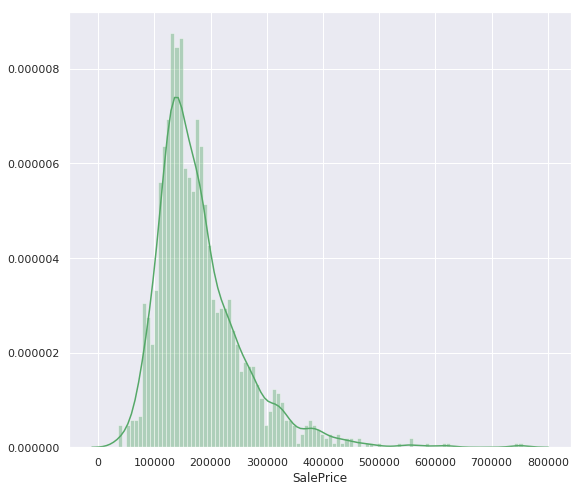

In [21]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [22]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [0]:
df_num = df.select_dtypes(include = ['float32', 'int64'])

In [38]:
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efccb5d07b8>,
      dtype=object)

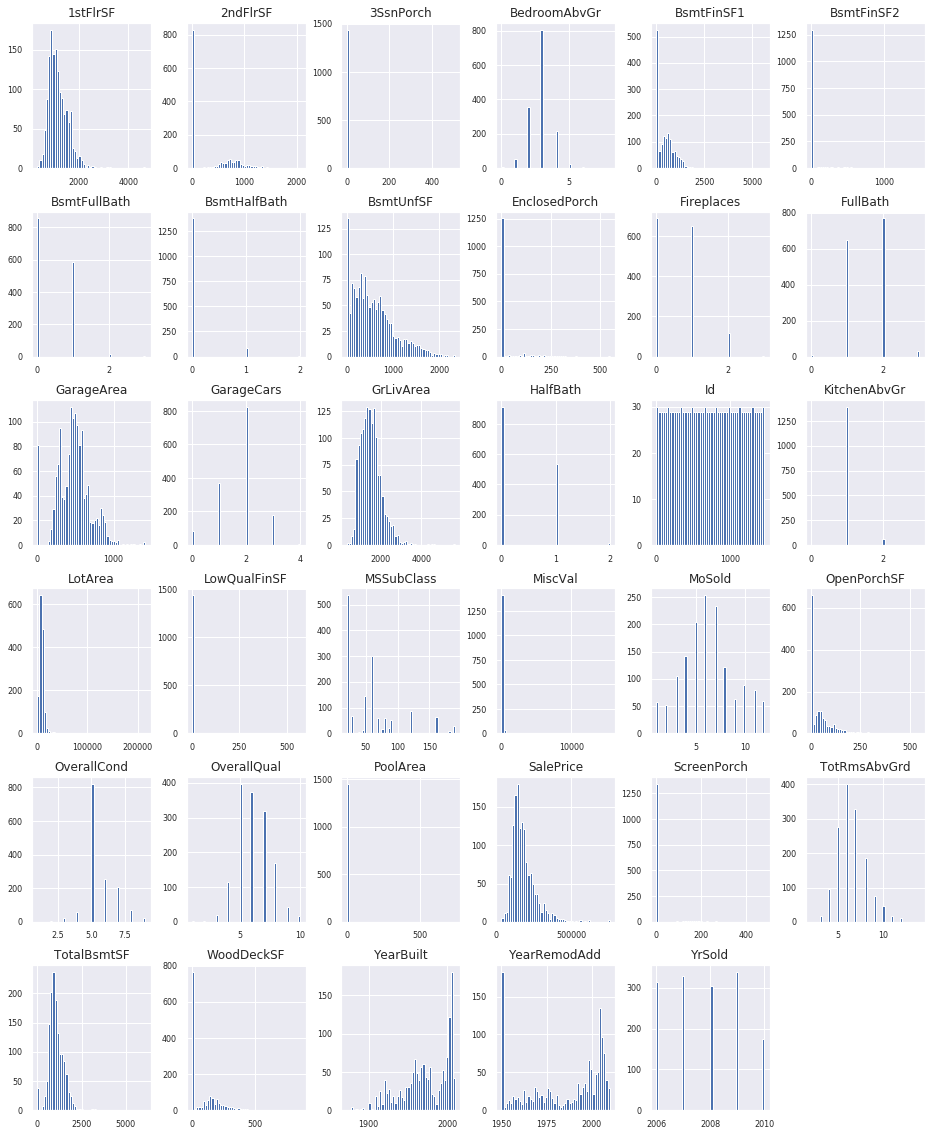

In [26]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [0]:
columns_no_variation = ["3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "EnclosedPorch", 
         "KitchenAbvGr", "LowQualFinSF", "MiscVal", "PoolArea", "ScreenPorch", "WoodDeckSF", "YrSold"]

In [0]:
df_num.drop(columns=columns_no_variation, inplace=True)

In [41]:
len(df_num)

1460

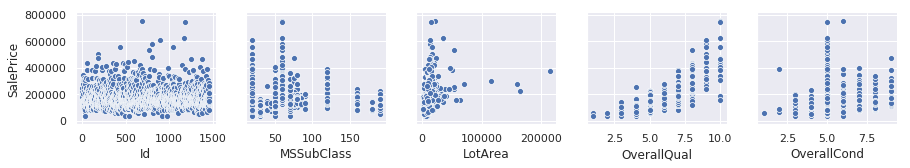

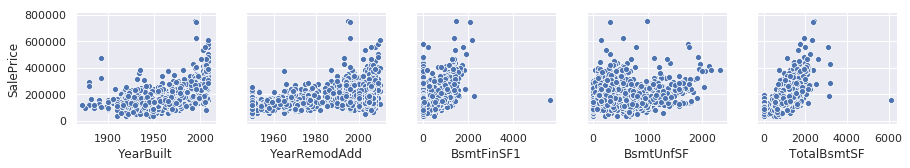

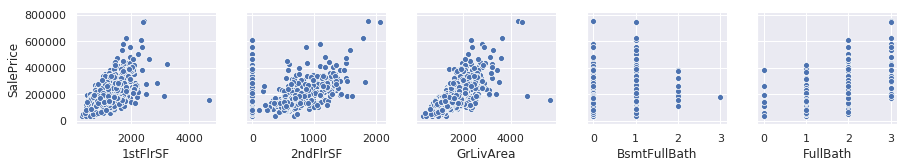

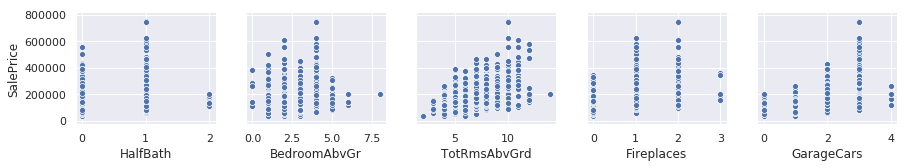

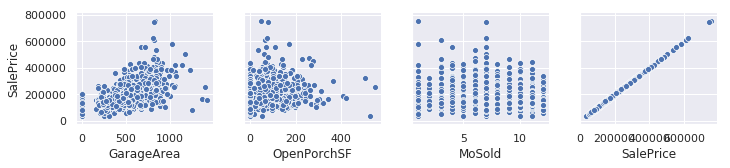

In [69]:
for i in range(0, len(df_num.columns), 5):
  sns.pairplot(
      data=df_num, 
      x_vars = df_num.columns[i: i+5],
      y_vars = ['SalePrice']
  )

In [0]:
columns_white_noise = ['Id']

In [0]:
df_num.drop(columns=columns_white_noise, inplace=True)

In [77]:
# Id, MoSold do not provide any trend. Lets do correlation
#corr = df_num.drop('SalePrice', axis=1).corr()
corr = df_num.corr()
corr["SalePrice"]

Id             -0.021917
MSSubClass     -0.084284
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageCars      0.640409
GarageArea      0.623431
OpenPorchSF     0.315856
MoSold          0.046432
SalePrice       1.000000
Name: SalePrice, dtype: float64

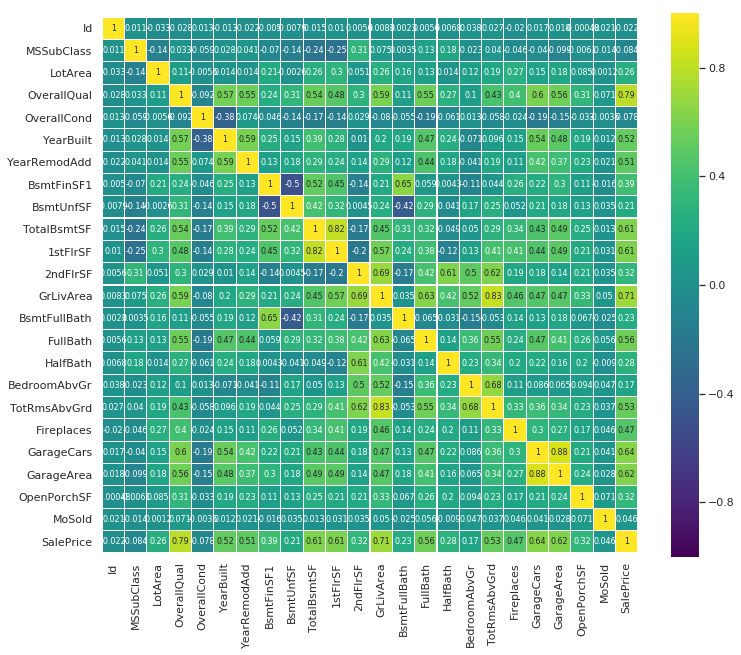

In [78]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidth=0.1, annot=True, annot_kws={'size': 8}, square=True)

In [0]:
# Q->Q
#C->Q

In [11]:
df_not_num = df.select_dtypes(include=['O'])
df_not_num.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
df_not_num.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


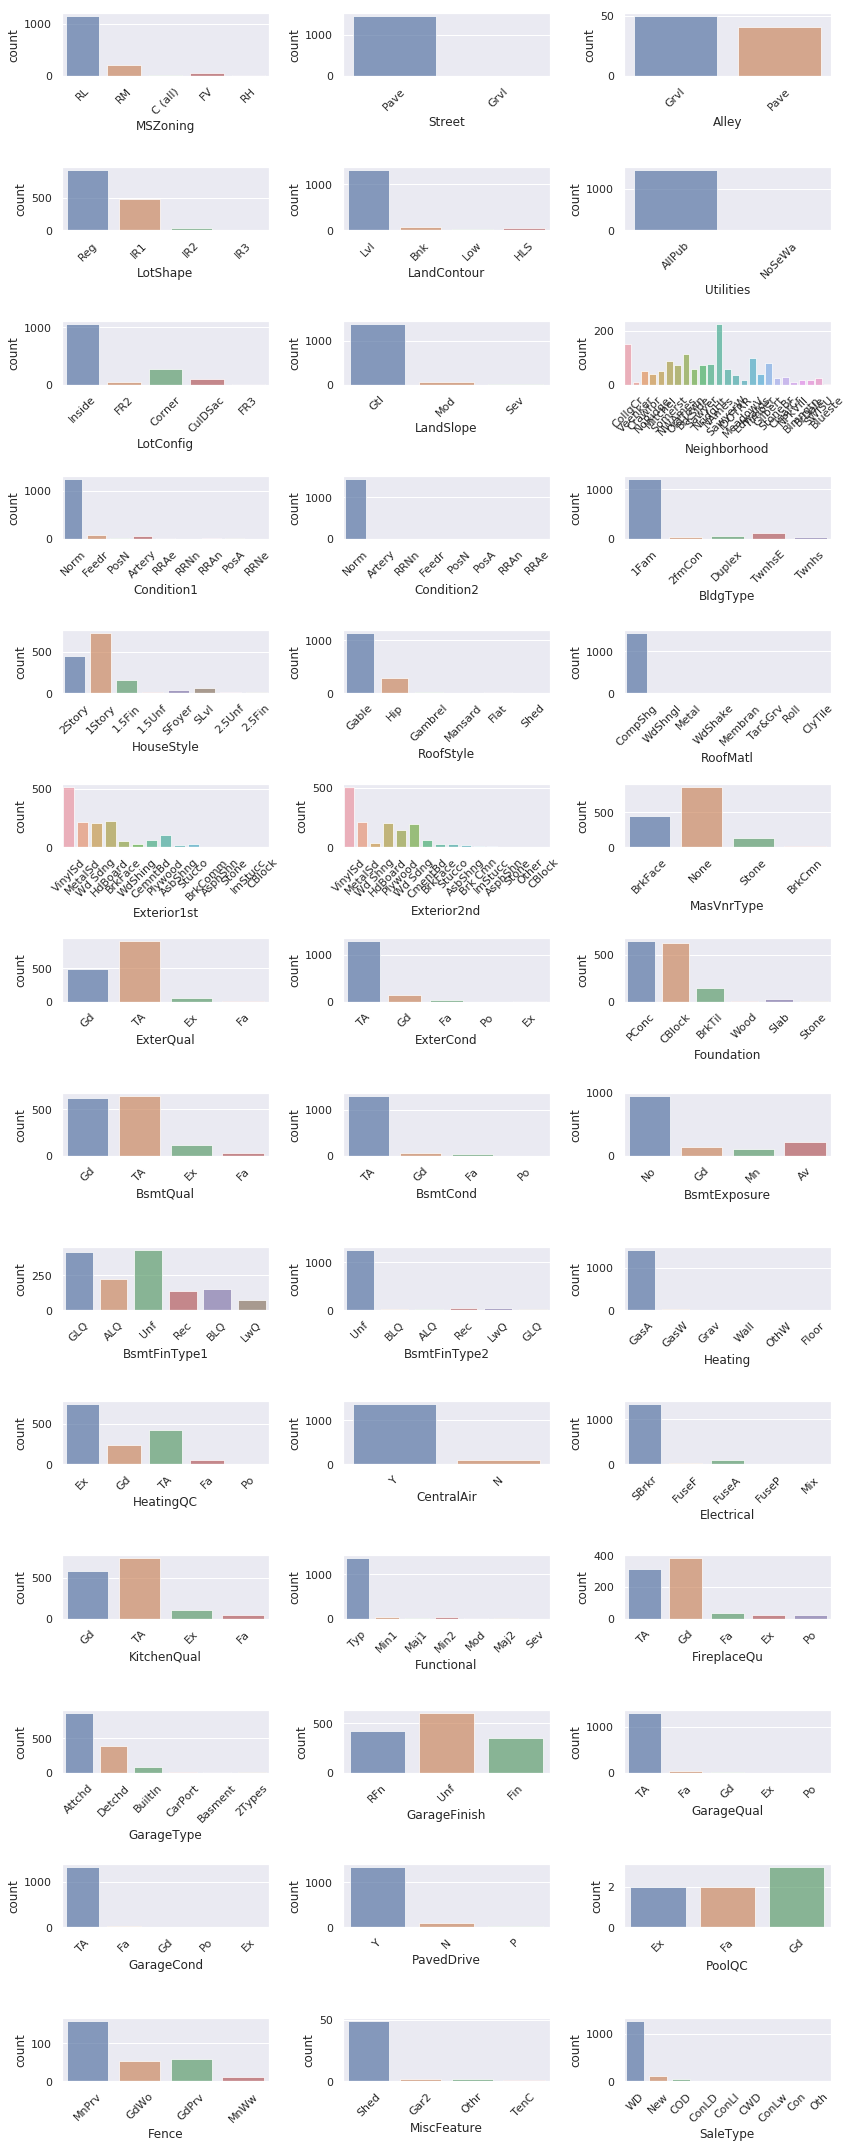

In [100]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
  sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)
  
fig.tight_layout()


In [0]:
cat_not_vary_column = ["MSZoning", "Street", "LandContour", "Utilities", "LandSlope", "Condition1", 
 "Condition2", "BldgType", "RoofMatl", "ExterCond", "BsmtFinType2", "Heating", 
 "CentralAir", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive", "MiscFeature", "SaleType"]

In [15]:
df_not_num.drop(columns=cat_not_vary_column, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
df_not_num["SalePrice"] = df["SalePrice"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


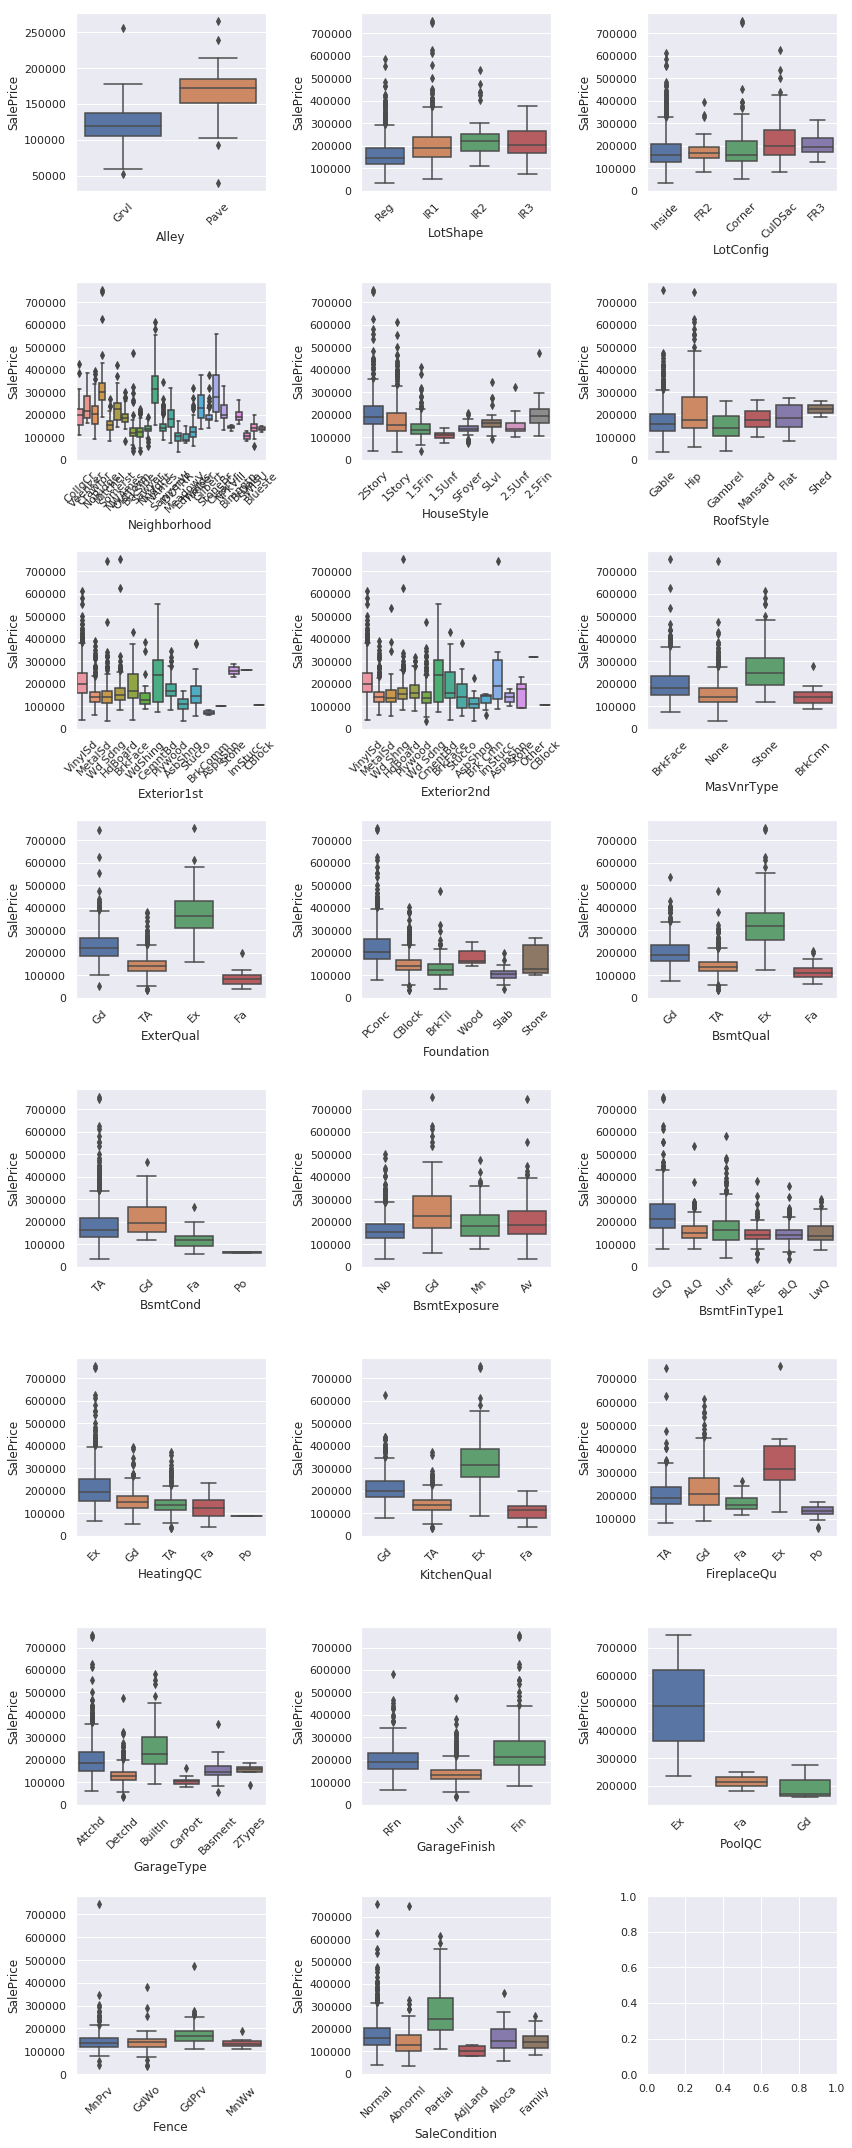

In [26]:
"""
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="BsmtExposure", y='SalePrice', data=df)
plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
"""


fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
  if df_not_num.columns[i] != 'SalePrice':
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.boxplot(x=df_not_num.columns[i], y='SalePrice', data=df_not_num, ax=ax)
fig.tight_layout()


Missing Display

In [0]:
import missingno as msno

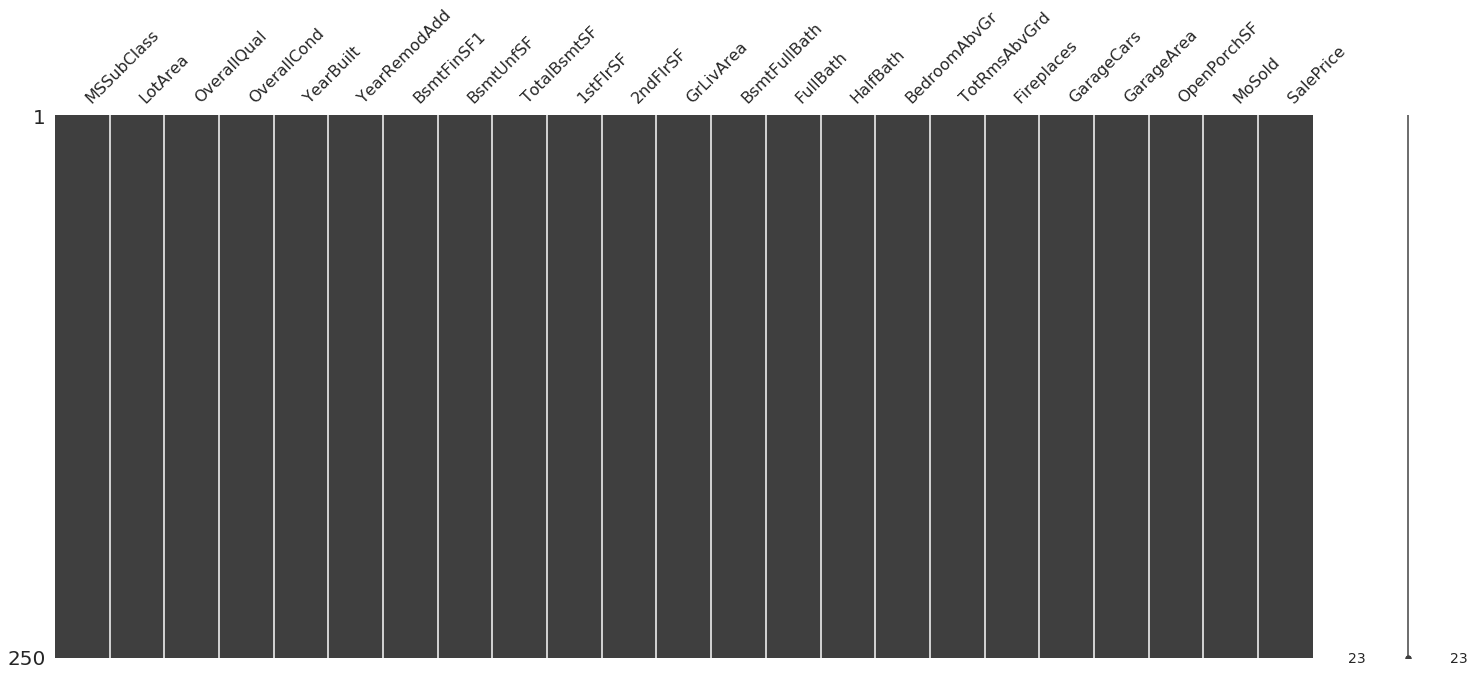

In [48]:
msno.matrix(df_num.sample(250))

<Figure size 360x432 with 0 Axes>

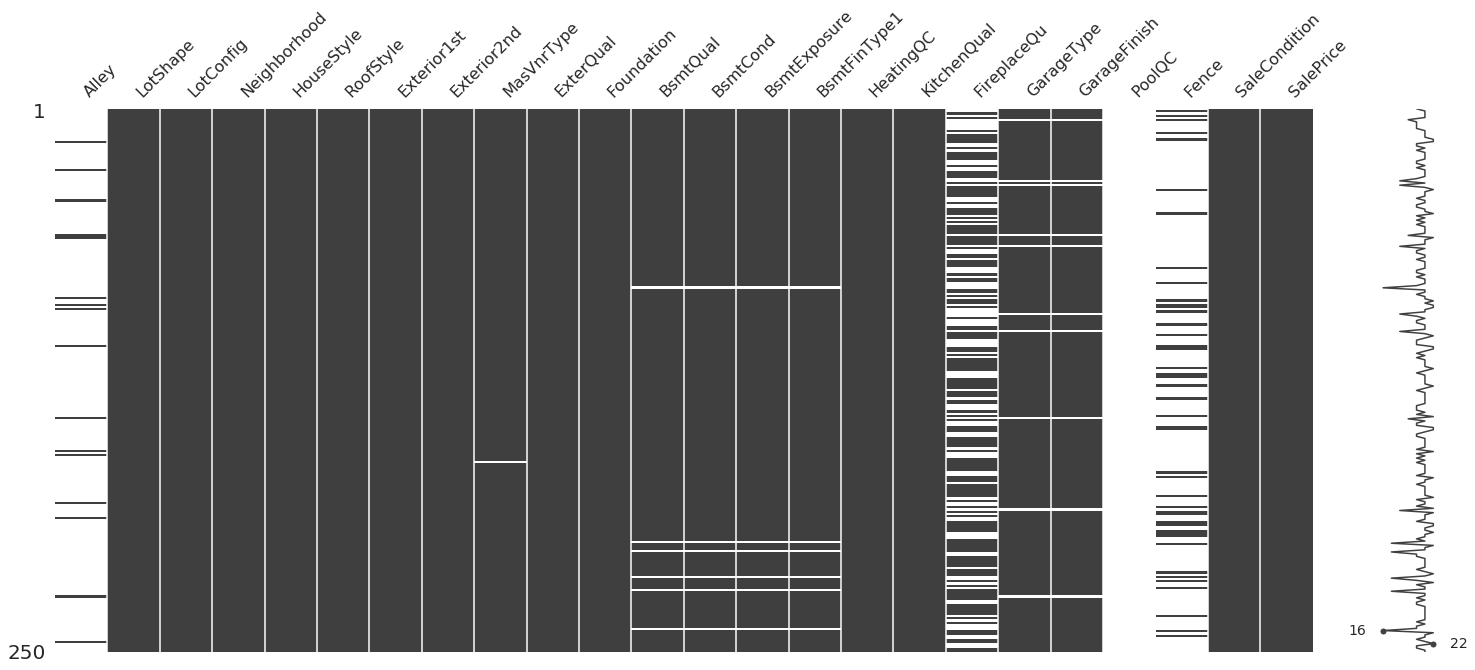

In [33]:
msno.matrix(df_not_num.sample(250))

In [0]:
columns_minimal_value = ["Alley", "PoolQC", "Fence"]

In [0]:
df_not_num.drop(columns=columns_minimal_value, inplace=True)

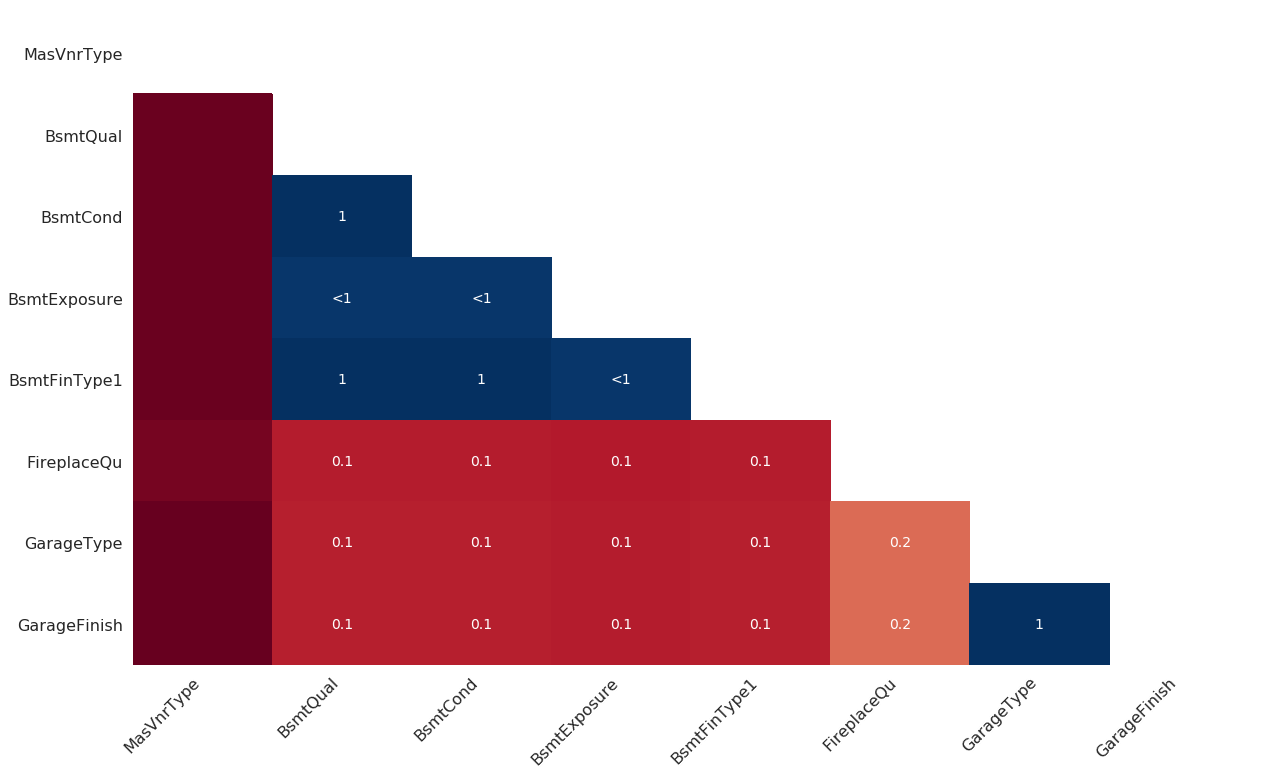

In [52]:
msno.heatmap(df_not_num)

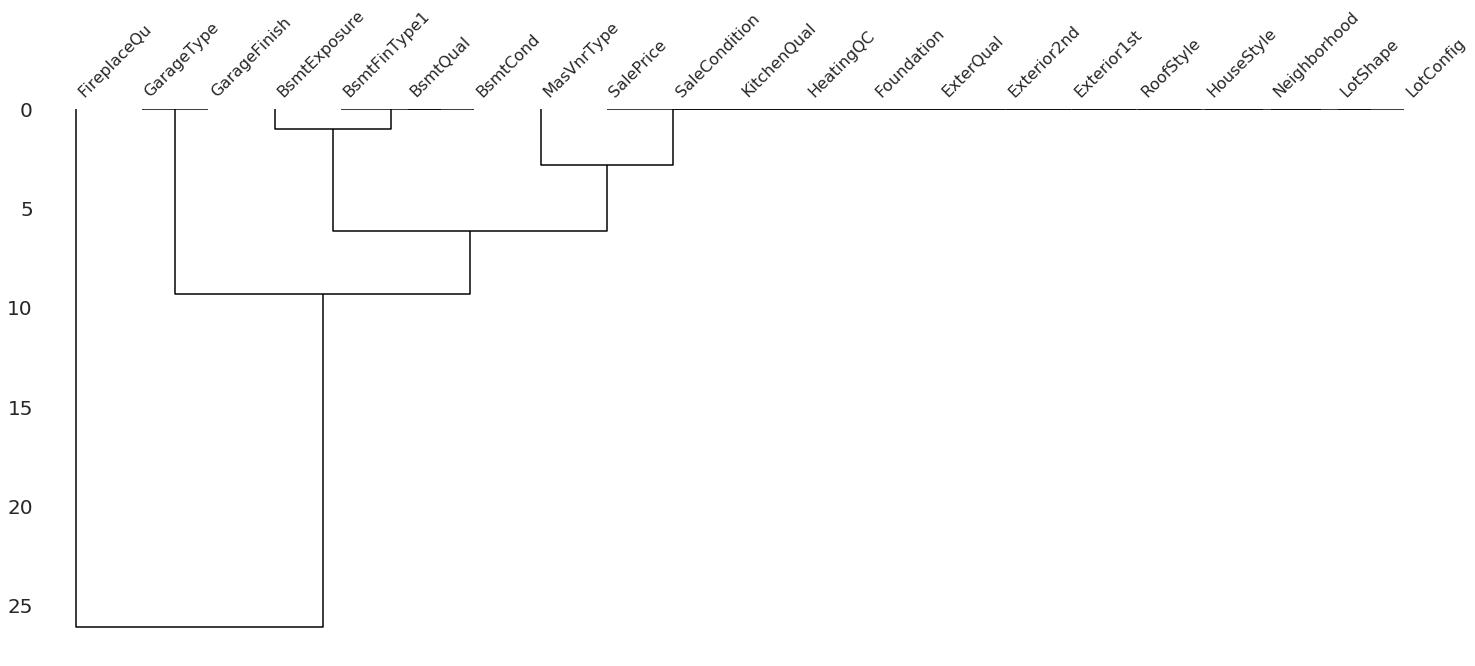

In [57]:
msno.dendrogram(df_not_num)

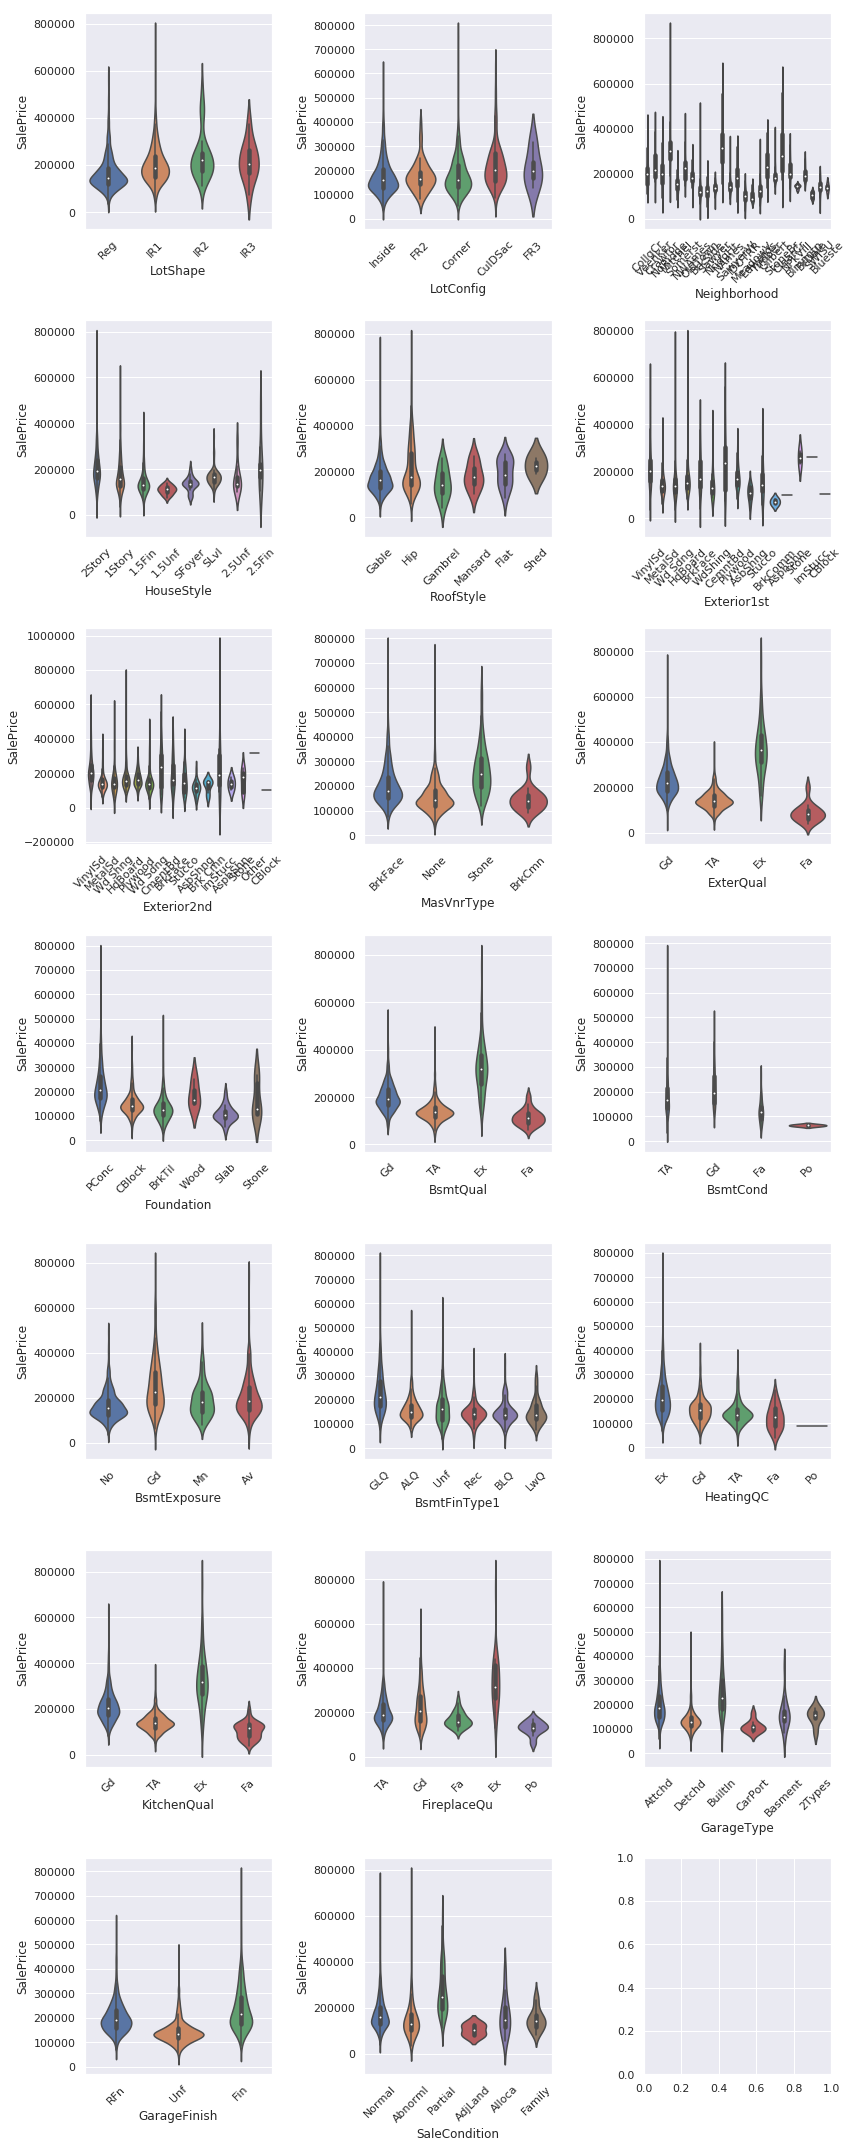

In [60]:

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
  if df_not_num.columns[i] != 'SalePrice':
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.violinplot(df_not_num.columns[i], 'SalePrice', data = df_not_num, ax=ax)
fig.tight_layout()